## Home Credit Default Risk
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders. 

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

This notebook tries to explore the data and learn more about it. It also tries to predict the default risk using logistic regression.

In [1]:
# Initializations required for the whole notebook
import pandas as pd
import numpy as np

from sklearn import preprocessing 
import matplotlib.pyplot as plt
plt.rc("font", size=14)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)

In [2]:
#Store file path
file_path = r"C:\Users\kbhaler\Documents\Ketaki_Study\Home Credit Default Risk\application_train.csv"

# Read data into a dataframe
data = pd.read_csv(file_path)


In [3]:
#Understand shape and columns of the training data set

print(data.shape)
print(list(data.columns))

(307511, 122)
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONA

## Feature Selection
There are so many columns which looks unuseful in first screening. Let's try to build a simple but effective model with few most important features.
Initially we are selecting the features based on intuition. But in later notebooks we will use more sophisticated statistical methods for feature selection

In [4]:
# Drop unrequired columns
data = data.drop(columns=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
                   'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
                   'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
                   'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 
                   'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
                   'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
                   'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
                   'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
                   'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
                   'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
                   'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
                   'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
                   'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'])

In [5]:
#Let's look at the data after dropping columns
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Let's unique values of the categorical data
data['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [7]:
#There are many categories in income type. Let's group together few categories.
data['NAME_INCOME_TYPE'] = np.where(data['NAME_INCOME_TYPE'] == 'Pensioner', 'Low income', data['NAME_INCOME_TYPE'])
data['NAME_INCOME_TYPE'] = np.where(data['NAME_INCOME_TYPE'] == 'Commercial associate', 'Low income', data['NAME_INCOME_TYPE'])
data['NAME_INCOME_TYPE'] = np.where(data['NAME_INCOME_TYPE'] == 'Student', 'Low income', data['NAME_INCOME_TYPE'])
data['NAME_INCOME_TYPE'] = np.where(data['NAME_INCOME_TYPE'] == 'Unemployed', 'Low income', data['NAME_INCOME_TYPE'])

In [8]:
#Distribution of the target variable
data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

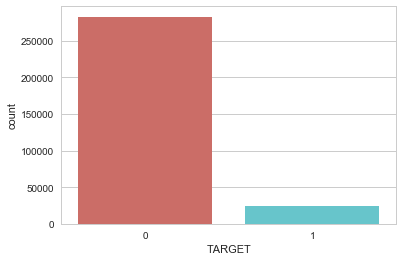

<Figure size 432x288 with 0 Axes>

In [9]:
# Visual distribution of the target variable
sns.countplot(x = 'TARGET', data=data, palette = 'hls')
plt.show()
plt.savefig('count_plot')

In [10]:
#% distribution of the Target variable
count_no_default = len(data[data['TARGET'] == 0])
count_default = len(data[data['TARGET'] == 1])
pct_no_default = count_no_default/(len(data['TARGET']))
print("The percentage of non default is", pct_no_default*100)

pct_default = count_default/(len(data['TARGET']))
print("The percentage of default is", pct_default*100)


The percentage of non default is 91.92711805431351
The percentage of default is 8.072881945686495


In [11]:
# Mean of features(independent variables) grouped by Target
data.groupby('TARGET').mean()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,,,,,,,,,,,,,,,,,,,,,
0,278244.744536,0.412946,169077.722266,602648.282002,27163.623349,542736.795003,0.021021,-16138.176397,65696.146123,-5029.941065,...,0.139148,1.398923,0.096688,-976.388294,0.006380,0.006914,0.034315,0.270697,0.265939,1.889199
1,277449.167936,0.463807,165611.760906,557778.527674,26481.744290,488972.412554,0.019131,-14884.828077,42394.675448,-4487.127009,...,0.191980,1.477672,0.138247,-808.796818,0.006672,0.008036,0.034919,0.227926,0.259923,2.028783


In [12]:
#Mean of featured grouped by contract type
data.groupby('NAME_CONTRACT_TYPE').mean()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
NAME_CONTRACT_TYPE,,,,,,,,,,,,,,,,,,,,,
Cash loans,278125.362338,0.083459,0.410025,169069.513575,627965.732538,28244.263958,560563.664485,0.020748,-16159.256060,66310.442020,...,0.144646,1.419809,0.100805,-979.442370,0.00639,0.007183,0.035370,0.271634,0.271091,1.931579
Revolving loans,278704.656375,0.054783,0.483828,166217.017656,324017.982172,16316.822637,325724.371573,0.022014,-14875.175313,40101.836709,...,0.131356,1.262359,0.092608,-805.269169,0.00652,0.005240,0.024641,0.226529,0.211328,1.595304


In [13]:
# Mean of variables grouped by gender
data.groupby('CODE_GENDER').mean()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CODE_GENDER,,,,,,,,,,,,,,,,,,,,,
F,278235.964094,0.069993,0.392397,156032.309247,592766.717305,26304.815242,532406.220509,0.020728,-16502.507177,79693.262759,...,0.149197,1.417557,0.103884,-977.919594,0.006212,0.006910,0.034590,0.261551,0.269703,1.924312
M,278076.627828,0.101419,0.464548,193396.482153,611095.197084,28657.681177,549942.314404,0.021138,-15140.050562,33220.412187,...,0.132244,1.381544,0.092614,-933.841583,0.006776,0.007178,0.033915,0.278855,0.257166,1.852091
XNA,200636.500000,0.000000,0.750000,186750.000000,399375.000000,19968.750000,421875.000000,0.029672,-13561.250000,-4090.500000,...,1.250000,4.250000,1.250000,-827.750000,0.000000,0.000000,0.000000,0.750000,0.250000,3.500000


In [14]:
#More information about target variable based on code gender
data.groupby('CODE_GENDER')['TARGET'].value_counts()

CODE_GENDER  TARGET
F            0         188278
             1          14170
M            0          94404
             1          10655
XNA          0              4
Name: TARGET, dtype: int64

In [15]:
#counts of target variable based on various income types
data.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts()

NAME_INCOME_TYPE  TARGET
Businessman       0             10
Low income        0         118669
                  1           8350
Maternity leave   0              3
                  1              2
State servant     0          20454
                  1           1249
Working           0         143550
                  1          15224
Name: TARGET, dtype: int64

Text(0.5,1,'Credit Default freq for gender')

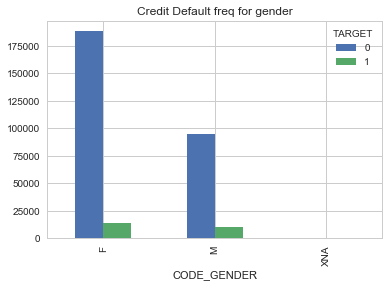

In [16]:
## Let's try to find the relavance between multiple variables and the target
#Credit Default Freq
%matplotlib inline
pd.crosstab(data.CODE_GENDER,data.TARGET).plot(kind = 'bar')
plt.title('Credit Default freq for gender')

Text(0.5,1,'Credit Default freq for contract type')

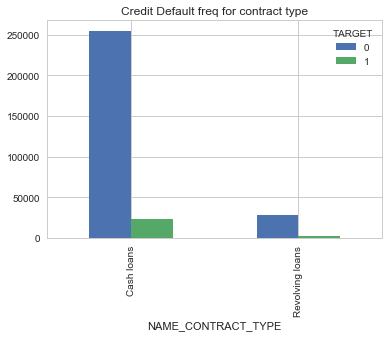

In [17]:
#Credit Default Freq
%matplotlib inline
pd.crosstab(data.NAME_CONTRACT_TYPE,data.TARGET).plot(kind = 'bar')
plt.title('Credit Default freq for contract type')

Text(0.5,1,'Credit Default freq for gender')

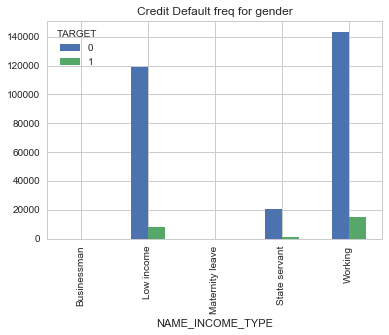

In [18]:
#Credit Default Freq
%matplotlib inline
pd.crosstab(data.NAME_INCOME_TYPE,data.TARGET).plot(kind = 'bar')
plt.title('Credit Default freq for gender')

Text(0.5,1,'Credit Default freq for education type')

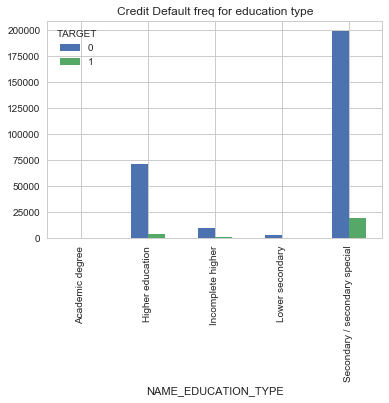

In [19]:
#Credit Default Freq
%matplotlib inline
pd.crosstab(data.NAME_EDUCATION_TYPE,data.TARGET).plot(kind = 'bar')
plt.title('Credit Default freq for education type')

# Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [20]:
data.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [21]:
#Let's drop some more columns to refine our data input
data = data.drop(columns = ['NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                     'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
                     'AMT_REQ_CREDIT_BUREAU_YEAR']);

In [22]:
print(data.isnull().sum())

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT        

In [23]:
data = data.drop(columns = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']);

In [24]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [25]:
data_reg = data[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'AMT_CREDIT', 'AMT_INCOME_TOTAL']].copy()
data_reg.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_CREDIT,AMT_INCOME_TOTAL
0,100002,1,Cash loans,M,406597.5,202500.0
1,100003,0,Cash loans,F,1293502.5,270000.0
2,100004,0,Revolving loans,M,135000.0,67500.0
3,100006,0,Cash loans,F,312682.5,135000.0
4,100007,0,Cash loans,M,513000.0,121500.0


## One Hot Encoding
A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [26]:
## Let's use OHE on contract type and gender

#cat_vars = ['Cash loans', 'Revolving loans']
#for i in cat_vars:
#    cat_list = 'i' + '_' + i
#    cat_list = pd.get_dummies(data_reg[i], prefix = i)
#    data_temp = data_reg.join(cat_list)
#    data_reg = data_temp

data_contact_type = pd.get_dummies(data_reg['NAME_CONTRACT_TYPE'])
data_gender = pd.get_dummies(data_reg['CODE_GENDER'])
#data_temp.head()
#data_gender.head()
frames = [data_reg, data_contact_type, data_gender]
data_final = pd.concat(frames, axis = 1)
data_final = data_final.drop(columns = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER'])
data_final.head()


,TARGET,AMT_CREDIT,AMT_INCOME_TOTAL,Cash loans,Revolving loans,F,M,XNA
0,1,406597.5,202500.0,1,0,0,1,0
1,0,1293502.5,270000.0,1,0,1,0,0
2,0,135000.0,67500.0,0,1,0,1,0
3,0,312682.5,135000.0,1,0,1,0,0
4,0,513000.0,121500.0,1,0,0,1,0


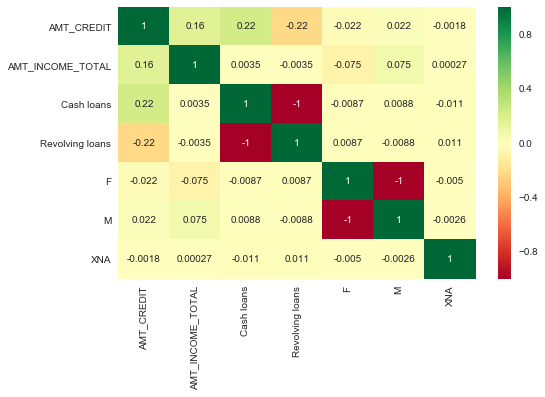

In [27]:
## Let's look at the heatmap of the features we have selected

Selected_features = ['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'Cash loans', 'Revolving loans', 'F', 'M', 'XNA']
X = data_final[Selected_features]

plt.subplots(figsize = (8,5))
sns.heatmap(X.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

In [28]:
#Y = data_reg.TARGET
#X = data_reg['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']

#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

#logreg = LogisticRegression()

#logreg.fit(X, Y)

#x_min, x_max = X[:, 0].min()

#rfe = RFE(logreg, 20)
#rfe = rfe.fit(X, y)
#print(rfe.support_)
#print(rfe.ranking_)

## Logistic Regression
Let's use logistic regression classification technique to train the model.

Train/Test split results:
LogisticRegression accuracy is 0.919
LogisticRegression log_loss is 0.314
LogisticRegression auc is 0.522


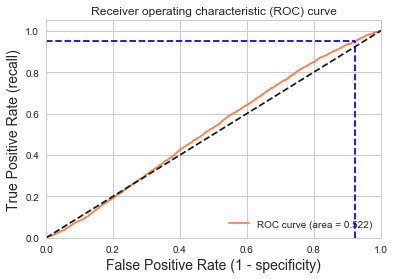

Using a threshold of 0.013 guarantees a sensitivity of 0.950 and a specificity of 0.076, i.e. a false positive rate of 92.37%.


In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X = data_final[Selected_features]
y = data_final['TARGET']

#Let's created dataset for crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

#Learning model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict using cross validation set
y_pred = logreg.predict(X_test)

y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95))

plt.figure()
plt.plot(fpr, tpr, color = 'coral', label = 'ROC curve (area = %0.3f)' %auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))